In [60]:
import os

cwd = os.getcwd()

if cwd.endswith('prototype'):
    PATH = os.path.join('..', 'data', 'handwritten-hanacaraka')
    os.chdir(PATH)
    new_cwd = os.getcwd()

    print(f"The current working directory was: {cwd}")
    print(f"It has been changed to: {new_cwd}")

else:
    print(f"The current working directory is: {cwd}")

The current working directory is: d:\Python\hanacaraka-classifier\data\preprocess_Images


In [61]:
from PIL import Image

if os.getcwd().endswith('handwritten-hanacaraka'):
    subdirs = [d for d in os.listdir() if os.path.isdir(d)]
    
    image_files = []
    for subdir in subdirs:
        image_files.extend([os.path.join(subdir, f) for f in os.listdir(subdir) if f.endswith('.png')])
    
    print(f'Number of image files: {len(image_files)}\n')
    
    corrupted_files = []
    for image_file in image_files:
        try:
            img = Image.open(image_file)
        except:
            corrupted_files.append(image_file)
            
    print(f'Number of corrupted files: {len(corrupted_files)}\n')
    print(f'Corrupted files: {os.linesep.join(corrupted_files)}')

In [62]:
image_files = [f for f in image_files if f not in corrupted_files]

print(f'Number of image files: {len(image_files)}')

Number of image files: 1562


In [63]:
import shutil
import os


if os.getcwd().endswith('handwritten-hanacaraka'):
    new_dir = os.path.join('..', 'renamed_images')
    
    for image_file in image_files:
        if os.name == 'nt':
            subdir, filename = image_file.split('\\')
        else:
            subdir, filename = image_file.split('/')
        subdir_path = os.path.join(new_dir, subdir)
        os.makedirs(subdir_path, exist_ok=True)
        new_filename = f'{subdir}_{len(os.listdir(subdir_path)) + 1}.png'
        shutil.copy(image_file, os.path.join(subdir_path, new_filename))
    
    print(f'number of image files: {len(image_files)}')

In [64]:
os.chdir(new_dir)
new_cwd = os.getcwd()

print(f"The current working directory were: {new_cwd}")

The current working directory were: d:\Python\hanacaraka-classifier\data\renamed_images


# Data Insights

In [65]:
print(f'Number of image each class')
for subdir in subdirs:
    print(f'{subdir}: {len(os.listdir(subdir))}')

Number of image each class
ba: 79
ca: 79
da: 79
dha: 77
ga: 78
ha: 78
ja: 78
ka: 79
la: 78
ma: 79
na: 79
nga: 79
nya: 78
pa: 77
ra: 75
sa: 79
ta: 76
tha: 77
wa: 79
ya: 79


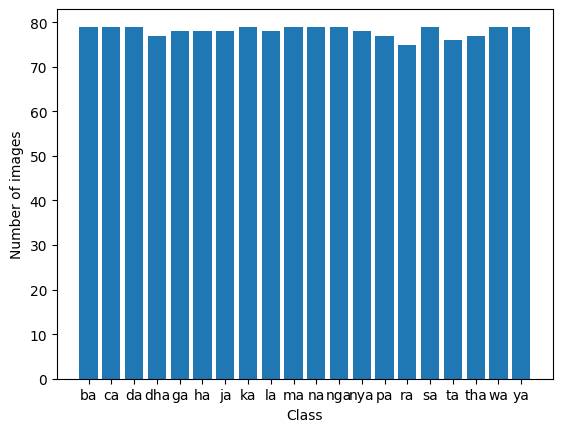

In [66]:
import matplotlib.pyplot as plt

# visualization on bar plot
fig, ax = plt.subplots()
ax.bar(subdirs, [len(os.listdir(subdir)) for subdir in subdirs])
ax.set_xlabel('Class')
ax.set_ylabel('Number of images')
plt.show()

well the number of images in each class is quite balanced.

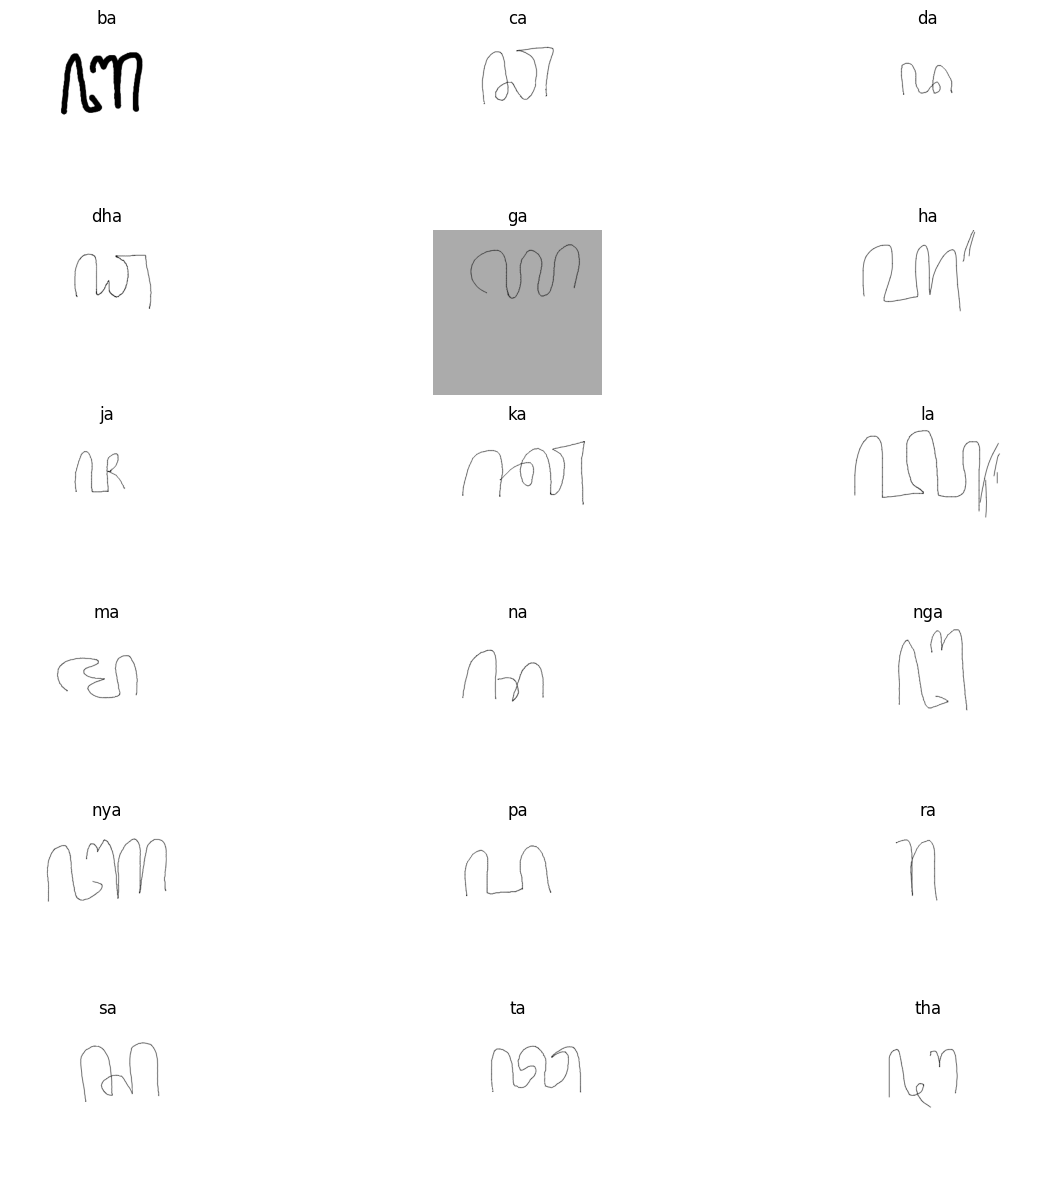

In [67]:
from matplotlib import pyplot as plt
import random

example_images = {} # key: class, value: list of image files
n_of_examples = 18

for subdir in subdirs:
    example_images[subdir] = random.sample(os.listdir(subdir), n_of_examples)

fig, axes = plt.subplots(n_of_examples//3, 3, figsize=(15, 15))

subdirs_iter = iter(subdirs)

for i in range(n_of_examples//3):
    for j in range(3):
        try:
            subdir = next(subdirs_iter)
        except StopIteration:
            break
        for k, image_file in enumerate(example_images[subdir]):
            img = Image.open(os.path.join(subdir, image_file))
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            axes[i, j].set_title(subdir)

plt.show()

the image were not quite good, so we need to preprocess the image/writing logic for selecting the `worth` image.

## Data Preprocessing 

In [72]:
# Preprocess image 
import PIL
def ProcessImage (im):
    #Resize
    im = im.resize((512, 512), PIL.Image.LANCZOS)

    #Grayscale
    im = im.convert('L')

    #Threshold
    threshold=127
    im = im.point( lambda p: 255 if p > threshold else 0 )

    #Sharpness
    im = im.filter(PIL.ImageFilter.SHARPEN)

    #Dilatation
    im = im.filter(PIL.ImageFilter.MinFilter(3))
    return im

In [73]:
from pathlib import Path
from PIL import ImageFilter
if os.getcwd().endswith('renamed_images'):
    os.makedirs('../preprocess_Images', exist_ok=True)
    for subdir in subdirs:
        path = Path(subdir)
        filenames = list(map(lambda x: x.name, path.glob('*.png')))
        os.makedirs(f'../preprocess_Images/{subdir}', exist_ok=True)
        for filename in filenames:
            try:
                im = Image.open(os.path.join(subdir, filename))
            except:
                print(f'Error reading file {subdir}/{filename}')
                continue
            im = ProcessImage(im)
            im.save(f'../preprocess_Images/{subdir}/{filename}')


In [74]:
if cwd.endswith('renamed_images'):
    PATH = os.path.join('..', 'preprocess_Images')
    os.chdir(PATH)
    new_cwd = os.getcwd()

    print(f"The current working directory was: {cwd}")
    print(f"It has been changed to: {new_cwd}")

else:
    print(f"The current working directory is: {cwd}")

The current working directory is: d:\Python\hanacaraka-classifier\data\preprocess_Images


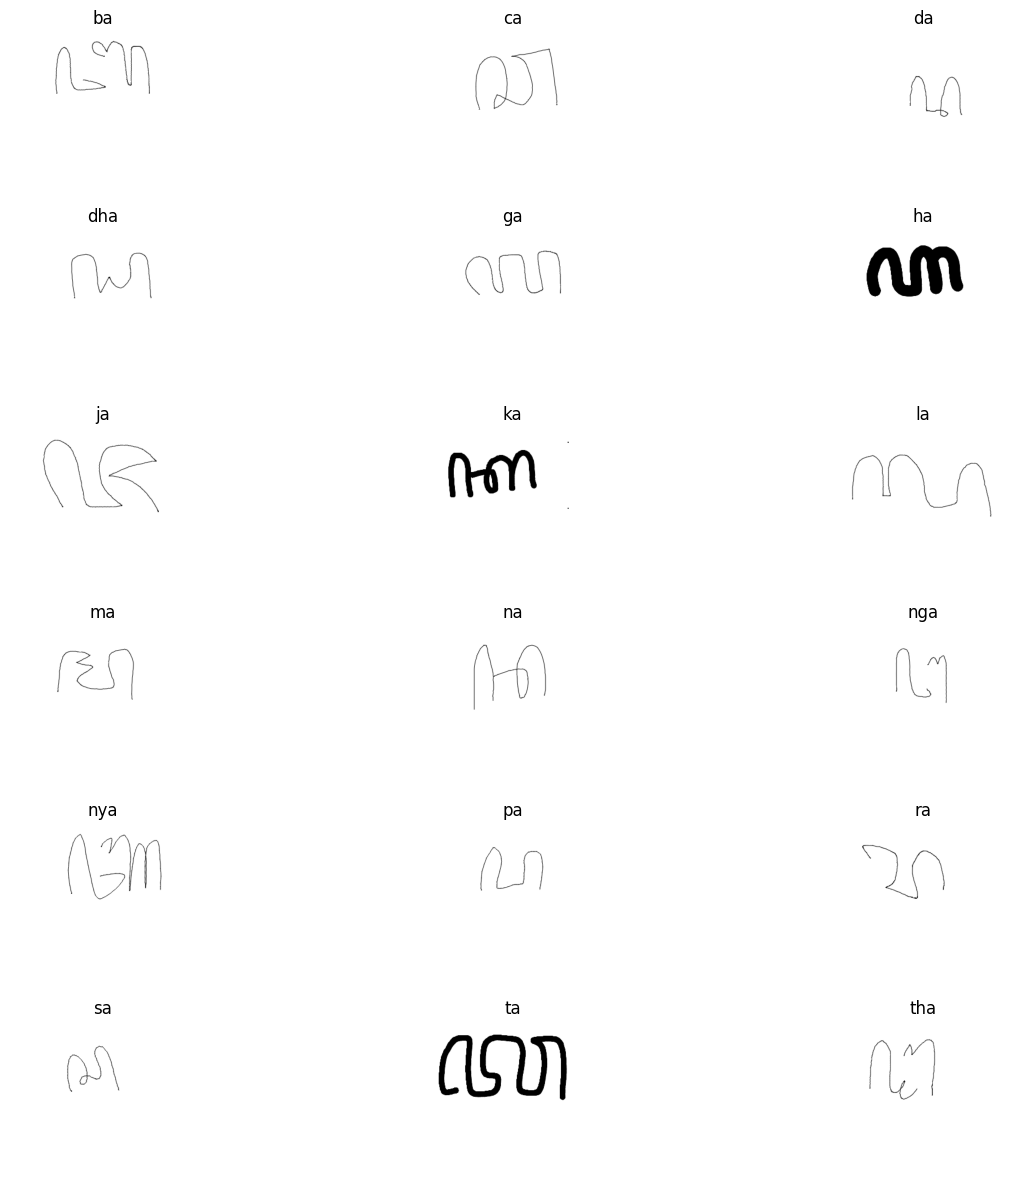

In [80]:
from matplotlib import pyplot as plt
import random

example_images = {} # key: class, value: list of image files
n_of_examples = 18

for subdir in subdirs:
    example_images[subdir] = random.sample(os.listdir(subdir), n_of_examples)

fig, axes = plt.subplots(n_of_examples//3, 3, figsize=(15, 15))

subdirs_iter = iter(subdirs)

for i in range(n_of_examples//3):
    for j in range(3):
        try:
            subdir = next(subdirs_iter)
        except StopIteration:
            break
        for k, image_file in enumerate(example_images[subdir]):
            img = Image.open(os.path.join(subdir, image_file))
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            axes[i, j].set_title(subdir)

plt.show()

Preview of preprocess images